In [1]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import pandas as pd
from src.config import TRANSFORMED_DATA_DIR

df = pd.read_parquet(TRANSFORMED_DATA_DIR / "tabular_data.parquet")

KeyboardInterrupt: 

In [ ]:
from datetime import datetime

from src.data_utils import split_time_series_data

X_train, y_train, X_test, y_test = split_time_series_data(
    df,
    cutoff_date=datetime(2023, 8, 1, 0, 0, 0),
    target_column="target"
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47840, 674)
(47840,)
(39780, 674)
(39780,)


In [ ]:
past_ride_columns = [c for c in X_train.columns if c.startswith("rides_")]
X_train_only_numeric = X_train[past_ride_columns]
X_test_only_numeric = X_test[past_ride_columns]

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model

model = ARIMA(y_train, order=(2, 1, 2))  # Adjust the order (p, d, q) as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(y_test))

d:\Taxi_Project\nyc_taxi\taxi_venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Taxi_Project\nyc_taxi\taxi_venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(y_test, predictions)
print(f"{test_mae:.4f}")

18.1063


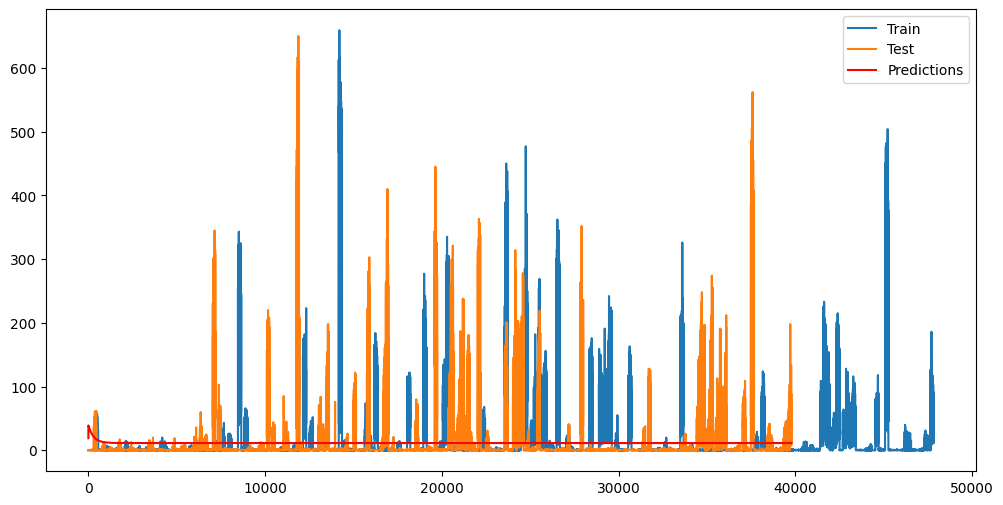

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

In [ ]:
from src.experiment_utils import set_mlflow_tracking, log_model_to_mlflow
from dotenv import load_dotenv
import os
load_dotenv() 

mlflow = set_mlflow_tracking()
log_model_to_mlflow(model_fit, X_test_only_numeric, "ARIMA", "mean_absolute_error", score=test_mae)

INFO:src.experiment_utils:MLflow tracking URI and credentials set.
2025/03/06 00:15:17 INFO mlflow.tracking.fluent: Experiment with name 'ARMA' does not exist. Creating a new experiment.
INFO:src.experiment_utils:Experiment set to: ARMA
INFO:src.experiment_utils:Logged mean_absolute_error: 18.106337485660937
ERROR:src.experiment_utils:An error occurred while logging to MLflow: 'The `start` argument could not be matched to a location related to the index of the data.'


🏃 View run gaudy-fox-349 at: https://dagshub.com/rockyglen/nyc_taxi.mlflow/#/experiments/9/runs/1e027247525443298bef47021e29f890
🧪 View experiment at: https://dagshub.com/rockyglen/nyc_taxi.mlflow/#/experiments/9


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'